In [61]:
import matplotlib
from matplotlib import pylab
import pandas as pd
from import_data import import_legacy
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot as plt
import numpy as np
from training import randomize_winner
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#1
# Import data from older seasons

#Specify columns for team_avgs calculation from following list:
    # ~~ Must always include Season, TeamID, Wins, Losses ~~
    # PPG, PAPG, RPG, APG, SPG, BPG, PFPG, TOPG, SOS, FGP
cols = ['Season', 'TeamID', 'Wins', 'Losses', 'PPG', 'PAPG', 'RPG', 'APG', 'SPG', 'BPG', 'PFPG', 'TOPG', 'SOS', 'FGP']

# Specify seasons to import data from, from 2006 to 2019 (inclusive)
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# import 2006-2019 regular season and tournament data, calculate team averages for tournament teams in each year
runtime, team_avgs, reg_season_df, tourney_df, seeds_df = import_legacy(cols, years)

# Estimated runtime: ~20 s
print(f"Runtime: {runtime:.2f} s\n")
print("Team Averages: \n", team_avgs)
print("All regular season matchups: \n", reg_season_df)


Runtime: 24.87 s

Team Averages: 
      Season  TeamID  Wins  Losses        PPG       PAPG        RPG        APG  \
0    2006.0  1104.0  17.0    12.0  69.965517  67.137931  37.000000  12.206897   
1    2006.0  1266.0  19.0    10.0  74.206897  69.655172  35.551724  15.275862   
2    2006.0  1130.0  25.0     7.0  74.531250  66.875000  35.187500  17.812500   
3    2006.0  1334.0  22.0     7.0  73.724138  63.586207  35.172414  15.655172   
4    2006.0  1181.0  30.0     3.0  82.515152  68.969697  32.909091  15.363636   
..      ...     ...   ...     ...        ...        ...        ...        ...   
891  2019.0  1205.0  20.0    11.0  75.774194  73.419355  32.870968  13.612903   
892  2019.0  1439.0  24.0     8.0  74.000000  62.093750  32.593750  15.343750   
893  2019.0  1387.0  23.0    12.0  67.057143  63.742857  39.771429  12.971429   
894  2019.0  1449.0  26.0     8.0  69.823529  64.382353  31.588235  11.676471   
895  2019.0  1429.0  27.0     6.0  79.030303  67.090909  40.060606  17.090

In [62]:
from import_data import import_year

#2
# Import data from 2022 season

tourney_team_ids = [1211, 1112, 1242, 1124, 1120, 1246, 1437, 1181, 1458, 1397, 1345, 1403, 1417, 1228, 1344, 1116,
                        1163, 1222, 1388, 1234, 1104, 1261, 1400, 1161, 1425, 1293, 1277, 1326, 1129, 1314, 1361, 1371,
                        1166, 1395, 1266, 1272, 1362, 1274, 1260, 1172, 1235, 1276, 1461, 1353, 1231, 1439, 1323, 1412,
                        1350, 1308, 1151, 1355, 1436, 1103, 1255, 1463, 1159, 1286, 1174, 1389, 1240, 1168, 1209, 1313,
                        1460, 1136, 1411, 1394]

#Specify columns for team_avgs calculation from following list:
    # ~~ Must always include Season, TeamID, Wins, Losses ~~
    # PPG, PAPG, RPG, APG, SPG, BPG, PFPG, TOPG, SOS, FGP
cols = ['Season', 'TeamID', 'Wins', 'Losses', 'PPG', 'PAPG', 'RPG', 'APG', 'SPG', 'BPG', 'PFPG', 'TOPG', 'SOS', 'FGP']

runtime, team_avgs_2022, reg_2022_df = import_year(cols)

# Estimated runtime: 1 s
print(f"Runtime: {runtime:.2f} s\n")
print("Team Averages: \n", team_avgs_2022)
print("All regular season matchups: \n", reg_2022_df)


Runtime: 0.64 s

Team Averages: 
     Season  TeamID  Wins  Losses        PPG       PAPG        RPG        APG  \
0   2022.0  1211.0  26.0     3.0  87.827586  65.344828  41.482759  18.206897   
1   2022.0  1112.0  31.0     3.0  84.558824  67.529412  41.352941  19.911765   
2   2022.0  1242.0  28.0     6.0  78.588235  68.147059  37.352941  15.441176   
3   2022.0  1124.0  26.0     6.0  76.500000  63.625000  37.125000  15.843750   
4   2022.0  1120.0  27.0     5.0  78.718750  67.031250  39.937500  14.593750   
..     ...     ...   ...     ...        ...        ...        ...        ...   
63  2022.0  1313.0  24.0     6.0  75.100000  63.733333  38.766667  12.633333   
64  2022.0  1460.0  21.0    13.0  75.470588  71.058824  34.882353  13.941176   
65  2022.0  1136.0  22.0     9.0  77.903226  72.741935  41.548387  14.096774   
66  2022.0  1411.0  18.0    12.0  69.233333  65.500000  39.533333  10.833333   
67  2022.0  1394.0  23.0    11.0  76.911765  69.941176  38.352941  15.029412   

     

In [63]:
import time
from training import randomize_winner
#3
# Randomize order of winner in historical seasons
# Can't apply this to 2022 season due to differences in data

start_time = time.time()

train_cols = ["Season", "Team1ID", "Team2ID", "Winner", "Team1W", "Team1L", "Team1PPG", "Team1PAPG", "Team1RPG", "Team1APG",
              "Team1SPG", "Team1BPG", "Team1PFPG", "Team1TOPG", "Team1SOS", "Team1FGP", "Team2W", "Team2L", "Team2PPG",
              "Team2PAPG", "Team2RPG", "Team2APG", "Team2SPG", "Team2BPG", "Team2PFPG", "Team2TOPG", "Team2SOS", "Team2FGP"]

trim_tourney_df = tourney_df[["Season", "WTeamID", "LTeamID"]]

# For historical data, randomize the order of winning and losing teams
train_DF = randomize_winner(trim_tourney_df, team_avgs, train_cols, seeds_df, cols, years)

# Limit data to more recent games (since 2010)
train_data = train_DF[train_DF['Season'] >= 2010]
train_labels = train_data['Winner'].astype("int")
train_data = train_data.drop(columns=['Winner'])

print(f"Runtime: {time.time() - start_time:.2f} s\n")
print(train_data)
print(train_labels)


Runtime: 2.95 s

     Season  Team1ID  Team2ID  Team1W  Team1L   Team1PPG  Team1PAPG  \
252  2010.0   1124.0   1358.0    24.0     7.0  76.709677  66.548387   
253  2010.0   1139.0   1431.0    28.0     4.0  70.093750  60.031250   
254  2010.0   1140.0   1196.0    28.0     5.0  82.606061  65.666667   
255  2010.0   1242.0   1250.0    32.0     2.0  81.764706  63.794118   
256  2010.0   1243.0   1317.0    25.0     7.0  79.468750  69.218750   
..      ...      ...      ...     ...     ...        ...        ...   
877  2019.0   1246.0   1120.0    27.0     6.0  76.727273  65.424242   
878  2019.0   1181.0   1277.0    29.0     5.0  83.500000  67.558824   
879  2019.0   1277.0   1403.0    28.0     6.0  78.823529  65.529412   
880  2019.0   1438.0   1120.0    29.0     3.0  71.843750  55.062500   
881  2019.0   1438.0   1403.0    29.0     3.0  71.843750  55.062500   

      Team1RPG   Team1APG  Team1SPG  ...   Team2PPG  Team2PAPG   Team2RPG  \
252  38.645161  13.645161  6.387097  ...  79.892857  

In [64]:
from training import tourney_2022
import time

#4
# Calculate stat averages for 2022 tourney teams

start_time = time.time()

d = {'Team1ID': [1211,1129,1163,1116,1104,1403,1277,1181,1124,1314,1388,1417,1400,1345,1293,1246,1112,1371,1222,1228,1161,1397,1326,1437,1242,1361,1234,1344,1261,1458,1425,1120,1211,1116,1403,1181,1124,1417,1345,1293,1112,1228,1397,1437,1242,1344,1458,1120,1211,1181,1417,1345,1112,1437,1242,1274,1181,1314,1437,1242,1181,1242,1242], 'Team2ID': [1209,1272,1308,1436,1323,1286,1172,1168,1313,1266,1231,1103,1439,1463,1362,1389,1460,1395,1412,1151,1276,1255,1260,1174,1411,1166,1350,1355,1235,1159,1274,1240,1272,1308,1323,1277,1314,1388,1400,1389,1395,1222,1276,1326,1166,1350,1235,1274,1116,1403,1314,1389,1222,1276,1344,1235,1116,1389,1222,1274,1314,1437,1314]}
test_cols = ["Season", "Team1ID", "Team2ID", "Team1W", "Team1L", "Team1PPG", "Team1PAPG", "Team1RPG", "Team1APG", "Team1SPG", \
              "Team1BPG", "Team1PFPG", "Team1TOPG", "Team1SOS", "Team1FGP", "Team2W", "Team2L", "Team2PPG", "Team2PAPG", "Team2RPG", "Team2APG", "Team2SPG",\
              "Team2BPG", "Team2PFPG", "Team2TOPG", "Team2SOS", "Team2FGP"]


tourney_2022_df = tourney_2022(d, team_avgs_2022, test_cols)
print(f"Runtime: {time.time() - start_time:.2f} s\n")
print(tourney_2022_df)

Runtime: 0.11 s

    Season  Team1ID  Team2ID  Team1W  Team1L   Team1PPG  Team1PAPG   Team1RPG  \
0   2022.0   1211.0   1209.0    26.0     3.0  87.827586  65.344828  41.482759   
1   2022.0   1129.0   1272.0    27.0     7.0  68.705882  60.764706  34.970588   
2   2022.0   1163.0   1308.0    23.0     9.0  75.187500  65.156250  40.875000   
3   2022.0   1116.0   1436.0    25.0     8.0  76.939394  68.545455  38.151515   
4   2022.0   1104.0   1323.0    19.0    13.0  79.968750  76.406250  39.968750   
..     ...      ...      ...     ...     ...        ...        ...        ...   
58  2022.0   1437.0   1222.0    26.0     7.0  72.636364  63.090909  34.939394   
59  2022.0   1242.0   1274.0    28.0     6.0  78.588235  68.147059  37.352941   
60  2022.0   1181.0   1314.0    28.0     6.0  80.176471  67.147059  38.294118   
61  2022.0   1242.0   1437.0    28.0     6.0  78.588235  68.147059  37.352941   
62  2022.0   1242.0   1314.0    28.0     6.0  78.588235  68.147059  37.352941   

     Team1

Years: 2010 to 2019


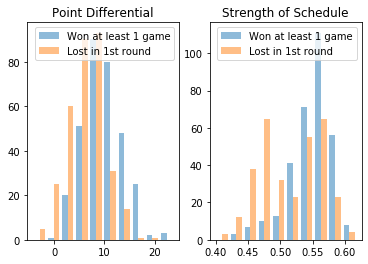

In [65]:
#5
# Shows histogram distribution of Point Differential and Strength of Schedule
# For winning teams and losing teams

# What years would you like to see data for? (max range is 2010 to 2019)

train_DF = randomize_winner(trim_tourney_df, team_avgs, train_cols, seeds_df, cols, years)

year_range = [2010, 2019]

def team_lists(team_avgs, game_data, year):
    temp_df = game_data[game_data["Season"] == year]
    winner_list = temp_df["WTeamID"].tolist()
    loser_list = temp_df["LTeamID"].tolist()
    return winner_list, loser_list


def print_histogram(team_avgs, game_data, years):

    sos_winner = []
    sos_loser = []
    pd_winner = []
    pd_loser = []

    for year in years:
        winner_list, loser_list = team_lists(team_avgs, game_data, year)
        temp_df = team_avgs[team_avgs["Season"] == year]
        for i in range(32):
            current = temp_df[temp_df["TeamID"] == int(winner_list[i])]
            sos_winner.append(current["SOS"].values[0])
            pd_winner.append(current["PPG"].values[0] - current["PAPG"].values[0])

            current = temp_df.loc[temp_df["TeamID"] == int(loser_list[i])]
            sos_loser.append(current["SOS"].values[0])
            pd_loser.append(current["PPG"].values[0] - current["PAPG"].values[0])


    #pyplot.hist(ppg_all, alpha=0.5, label="All teams")
    print(f"Years: {year_range[0]} to {year_range[1]}")
    plot1 = pyplot.subplot(1, 2, 1)
    pyplot.hist(x=[pd_winner, pd_loser], alpha=0.5, label=["Won at least 1 game", "Lost in 1st round"])
    pyplot.title("Point Differential")
    pyplot.legend(loc='best')
    plot2 = pyplot.subplot(1, 2, 2)
    pyplot.hist(x=[sos_winner, sos_loser], alpha=0.5, label=["Won at least 1 game", "Lost in 1st round"])
    pyplot.title("Strength of Schedule")
    pyplot.legend(loc='best')

    #pyplot.hist(ppg_loser, alpha=0.5, label="Lost in 1st round")

    pyplot.show()

print_histogram(team_avgs, tourney_df, list(range(year_range[0], year_range[1]+1)))

In [66]:
#6
# Calculate vegas game-by-game accuracy for 2022 tournament
start_time = time.time()
winners = [1,2,2,1,2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,2,1,1,1,1,2,2,1,2,1,2,1,1,1,1,1,2,1,1,2,1,2,2,1,1,1,2,2,2,1,2,2,2,1,1,1,1,1,1,1,2,1,1]
vegas_winners = [1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1]

vright = 0
vwrong = 0
for i in range(0,len(vegas_winners)):
    if vegas_winners[i] == winners[i]:
        vright += 1
    else:
        vwrong += 1

#print(f"# of Games correct: ",right)
#print(f"# of Games missed: ",wrong)
#print(f"Accuracy: ", (right) / (right + wrong))

print(f"Runtime: {time.time() - start_time:.4f} s\n")

print(f"Vegas # of Games correct: ",vright)
print(f"Vegas # of Games missed: ",vwrong)
print(f"Vegas Accuracy: ", (vright) / (vright + vwrong))

def accuracy(preds):
    right = 0
    wrong = 0
    for i in range(0,len(preds)):
        if preds[i] == winners[i]:
            right += 1
        else:
            wrong += 1
    return right / (right + wrong)

Runtime: 0.0003 s

Vegas # of Games correct:  42
Vegas # of Games missed:  21
Vegas Accuracy:  0.6666666666666666


In [68]:
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn import svm

xgb.set_config(verbosity=0)

#7
# Defines a function to predict games using a specified classification model
# NO OUTPUT for this cell, but it should be run to define the functions

def trainAndPredict(classifier, test_df, sampleSize, num_games):

    predicted_games = [0] * num_games

    for i in range(sampleSize):

        train_df_year = train_DF[train_DF['Season'] >= 2010]

        X = train_df_year.drop("Season", axis=1)
        X = X.drop(["Winner", "Team1ID", "Team2ID"], axis=1)
        y = train_df_year["Winner"]
        y = y.astype(int)

        test_X = test_df.drop(["Season", "Team1ID", "Team2ID"], axis=1)

        scaler = StandardScaler()
        scaled_X = scaler.fit_transform(X.values)
        scaled_test = scaler.fit_transform(test_X.values)
        X_proc = pd.DataFrame(scaled_X, index = X.index, columns = X.columns)
        test_proc = pd.DataFrame(scaled_test, index = test_X.index, columns = test_X.columns)

        # This code takes a VERY long time to run (>30 min) so it is commented out

        #C_range = np.logspace(-2, 10, 13)
        #gamma_range = np.logspace(-9, 3, 13)
        #param_grid = dict(gamma=gamma_range, C=C_range)
        #cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
        #grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
        #grid.fit(X, y)

        #print(
        #    "The best parameters are %s with a score of %0.2f"
        #    % (grid.best_params_, grid.best_score_)
        #)

        classifier.fit(X_proc, y)

        preds = classifier.predict(test_proc)
        for i in range(len(preds)):
            if preds[i] == 1:
                predicted_games[i] += 1
        
    overall_pred = [1] * num_games
    for i in range(len(predicted_games)):
        if predicted_games[i] < (sampleSize / 2):
            overall_pred[i] = 2
    return overall_pred

In [69]:
#8
#Game-by-game prediction accuracy:

start_time = time.time()

svm_preds = trainAndPredict(svm.SVC(C=4.2, gamma=0.01), tourney_2022_df, 1, 63)

print(f"Runtime: {time.time() - start_time:.2f} s\n")
print(f"SVM: {accuracy(svm_preds):.4f}")


Runtime: 0.02 s

SVM: 0.6508


SVM Runtime: 0.22 s

Avg game-by-game accuracy across all games from 2010-2019: 0.7032


(array([2., 3., 2., 1., 0., 0., 1., 0., 1., 1.]),
 array([0.65079365, 0.66507937, 0.67936508, 0.69365079, 0.70793651,
        0.72222222, 0.73650794, 0.75079365, 0.76507937, 0.77936508,
        0.79365079]),
 <a list of 10 Patch objects>)

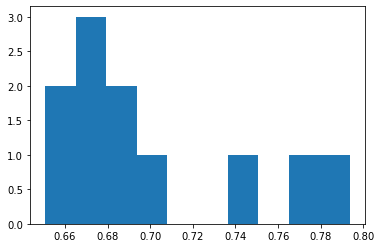

In [70]:
#9
# Predicts game-by-game outcomes from specified years

def predictYear(classifier, year, num_games):
    
    predicted_games = [0] * num_games
    
    test_data = train_DF[train_DF['Season'] == year]
    test_labels = test_data['Winner'].astype("int")
    test_data = test_data.drop(columns=['Winner'])

    training_data = train_DF[train_DF['Season'] != year]
    y = training_data['Winner']

    test_X = test_data.drop(["Season", "Team1ID", "Team2ID"], axis=1)
    X = training_data.drop("Season", axis=1)
    X = X.drop(["Winner", "Team1ID", "Team2ID"], axis=1)
    y = y.astype(int)

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X.values)
    scaled_test = scaler.fit_transform(test_X.values)
    test_proc = pd.DataFrame(scaled_test, index = test_X.index, columns = test_X.columns)

    X_proc = pd.DataFrame(scaled_X, index = X.index, columns = X.columns)

    accuracy_scores = []
    from sklearn.metrics import accuracy_score

    # Model Fit
    classifier.fit(X_proc, y)

    # Model Prediction
    preds = classifier.predict(test_proc)

    # Accuracy Score
    return accuracy_score(test_labels, preds)


def predictHistorical(classifier):
    acc_scores = []
    for year in years:
        if year >= 2010:
            score = predictYear(classifier, year, 63)
            acc_scores.append(score)
    return acc_scores

start_time = time.time()
svm_accuracies = predictHistorical(svm.SVC(C=4.6, gamma=0.01))
print(f"SVM Runtime: {time.time() - start_time:.2f} s\n")
print(f"Avg game-by-game accuracy across all games from 2010-2019: {sum(svm_accuracies) / len(svm_accuracies):.4f}")

svm_accuracies.append(accuracy(svm_preds))
pyplot.hist(svm_accuracies)        

In [71]:
#10
# Predicts and calculates bracket score for 2022 bracket

#All of the matchups had to be entered by hand due to the nature of the data collection for 2022
#This is something we would change the next time we do the project
firstRound = {'Team1ID': [1211,1129,1163,1116,1104,1403,1277,1181,1124,1314,1388,1417,1400,1345,1293,1246,1112,1371,1222,1228,1161,1397,1326,1437,1242,1361,1234,1344,1261,1458,1425,1120], 'Team2ID': [1209,1272,1308,1436,1323,1286,1172,1168,1313,1266,1231,1103,1439,1463,1362,1389,1460,1395,1412,1151,1276,1255,1260,1174,1411,1166,1350,1355,1235,1159,1274,1240]}
tournamentRounds = {'Round1': [1211,1272,1308,1116,1323,1403,1277,1181,1124,1314,1388,1417,1400,1345,1293,1389,1112,1395,1222,1228,1276,1397,1326,1437,1242,1166,1350,1344,1235,1458,1274,1120], \
                    'Round2': [1211,1116,1403,1181,1314,1417,1345,1389,1112,1222,1276,1437,1242,1344,1235,1274], \
                    'Round3': [1116,1181,1314,1389,1222,1437,1242,1274], \
                    'Round4': [1181,1314,1437,1242], 'Round5': [1314, 1242], 'Round6': [1242]}

#Each of the teams are assigned their correct seed, to account for sorting. This was done using an algorithm
#but was included as hard-coded since the seeds never change to reduce runtime
seed_dict = {1211: 'W01', 1209: 'W16', 1129: 'W08', 1272: 'W09', 1163: 'W05', 1308: 'W12', 1116: 'W04', 1436: 'W13', 1104: 'W06', 1323: 'W11', 1403: 'W03', 1286: 'W14', 1277: 'W07', 1172: 'W10', 1181: 'W02', 1168: 'W15', 1124: 'X01', 1313: 'X16', 1314: 'X08', 1266: 'X09', 1388: 'X05', 1231: 'X12', 1417: 'X04', 1103: 'X13', 1400: 'X06', 1439: 'X11', 1345: 'X03', 1463: 'X14', 1293: 'X07', 1362: 'X10', 1246: 'X02', 1389: 'X15', 1112: 'Y01', 1460: 'Y16', 1371: 'Y08', 1395: 'Y09', 1222: 'Y05', 1412: 'Y12', 1228: 'Y04', 1151: 'Y13', 1161: 'Y06', 1276: 'Y11', 1397: 'Y03', 1255: 'Y14', 1326: 'Y07', 1260: 'Y10', 1437: 'Y02', 1174: 'Y15', 1242: 'Z01', 1411: 'Z16', 1361: 'Z08', 1166: 'Z09', 1234: 'Z05', 1350: 'Z12', 1344: 'Z04', 1355: 'Z13', 1261: 'Z06', 1235: 'Z11', 1458: 'Z03', 1159: 'Z14', 1425: 'Z07', 1274: 'Z10', 1120: 'Z02', 1240: 'Z15'}
bracket_df = pd.DataFrame(data=firstRound)

#Predicts tournament outcome and calculates score
def tournament(classifier, round_bracket, round_num, bracket_score):
    round_df = pd.DataFrame(columns=test_cols)
    for row in round_bracket.iterrows():
        temp_list = [2022, row[1]['Team1ID'], row[1]['Team2ID']]
        
        #ordering new teams by seed
        if round_num > 1:
            team1_seed = seed_dict[temp_list[1]]
            team2_seed = seed_dict[temp_list[2]]

            
            team1_prefix = team1_seed[0:1]
            team2_prefix = team2_seed[0:1]

            team1_seed = int(team1_seed[1:3])
            team2_seed = int(team2_seed[1:3])
            
            if team1_seed > team2_seed:
                temp = temp_list[1]
                temp_list[1] = temp_list[2]
                temp_list[2] = temp
                
                
        #print(temp_list)
        team1_row = team_avgs_2022[team_avgs_2022["TeamID"] == temp_list[1]].values.tolist()
        team2_row = team_avgs_2022[team_avgs_2022["TeamID"] == temp_list[2]].values.tolist()
        team1_row[0].pop(0)
        team1_row[0].pop(0)
        team2_row[0].pop(0)
        team2_row[0].pop(0)

        temp_list.extend(team1_row[0])
        temp_list.extend(team2_row[0])
        # add that list to our DF
        temp_series = pd.Series(temp_list, index=test_cols)
        round_df = round_df.append(temp_series, ignore_index=True)
        
    #print(round_df)
    preds = trainAndPredict(classifier, round_df, 1, len(round_df.index))

    #if(round_num == 1):
        #return;
    
    round_dict = {'Team1ID': [], 'Team2ID': []}
    winners_arr = []
    for i in range(0, len(preds)):
        if i % 2 == 0:
            length = len(round_dict['Team1ID'])
            val = 0
            if preds[i] == 1:
                val = round_df.iloc[i]['Team1ID']
            else:
                val = round_df.iloc[i]['Team2ID']
                
            round_dict['Team1ID'].append(val)
            winners_arr.append(val)
        else:
            length = len(round_dict['Team2ID'])
            val = 0
            if preds[i] == 1:
                val = round_df.iloc[i]['Team1ID']
            else:
                val = round_df.iloc[i]['Team2ID']
                
            round_dict['Team2ID'].append(val)
            winners_arr.append(val)
    for i in range(0, len(winners_arr)):
        #print(f"Predicted: {winners_arr[i]}  Real: {tournamentRounds['Round' + str(round_num)][i]}")
        if winners_arr[i] == tournamentRounds['Round' + str(round_num)][i]:
            bracket_score += 10 * (2**(round_num - 1))
            #print(bracket_score)
    if round_num < 6:
        new_df = pd.DataFrame(data=round_dict)
        return tournament(classifier, new_df, round_num+1, bracket_score)
    else:
        return bracket_score

start_time = time.time()

svm_bracket_score = tournament(svm.SVC(C=4.6, gamma=0.01), bracket_df, 1, 0)
print(f"SVM Bracket Score (2022): {svm_bracket_score}")
print(f"Runtime: {time.time() - start_time:.2f} s\n")


#xgboost    
#eta-[0.05, 0.06, 0.11, 0.13, .15]

SVM Bracket Score (2022): 880
Runtime: 0.20 s



In [72]:
#11
# Predicts and calculates bracket score for previous years' tournaments

def predictByYear(classifier, round_df, year, num_games):
    
    predicted_games = [0] * num_games
    
    test_data = round_df

    training_data = train_DF[train_DF['Season'] != year]
    y = training_data['Winner']

    test_X = test_data.drop(["Season", "Team1ID", "Team2ID"], axis=1)
    X = training_data.drop("Season", axis=1)
    X = X.drop(["Winner", "Team1ID", "Team2ID"], axis=1)
    y = y.astype(int)

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X.values)
    scaled_test = scaler.fit_transform(test_X.values)
    test_proc = pd.DataFrame(scaled_test, index = test_X.index, columns = test_X.columns)

    X_proc = pd.DataFrame(scaled_X, index = X.index, columns = X.columns)

    accuracy_scores = []
    from sklearn.metrics import accuracy_score

    # Model Fit
    classifier.fit(X_proc, y)

    # Model Prediction
    preds = classifier.predict(test_proc)
    return preds
    
def tourneyByYear(classifier, round_bracket, round_num, start_index, bracket_score, year):
    round_df = pd.DataFrame(columns=test_cols)
    for row in round_bracket.iterrows():
        temp_list = [2022, row[1]['Team1ID'], row[1]['Team2ID']]
        seeds_year_df = seeds_df[seeds_df['Season'] == year]
        
        #ordering new teams by seed
        if round_num > 1:
            #print(row[1])
            team1_seed = seeds_year_df[seeds_year_df['TeamID'] == row[1]["Team1ID"]].values.tolist()[0][1]
            team2_seed = seeds_year_df[seeds_year_df['TeamID'] == row[1]["Team2ID"]].values.tolist()[0][1]
            team1_prefix = team1_seed[0:1]
            team2_prefix = team2_seed[0:1]
            
            team1_seed = int(team1_seed[1:3])
            team2_seed = int(team2_seed[1:3])
            
            if team1_seed > team2_seed:
                temp = temp_list[1]
                temp_list[1] = temp_list[2]
                temp_list[2] = temp
                
                
        #print(temp_list)
        team1_row = team_avgs[team_avgs['Season'] == year]
        team1_row = team_avgs[team_avgs["TeamID"] == temp_list[1]].values.tolist()
        
        team2_row = team_avgs[team_avgs['Season'] == year]
        team2_row = team_avgs[team_avgs["TeamID"] == temp_list[2]].values.tolist()
        team1_row[0].pop(0)
        team1_row[0].pop(0)
        team2_row[0].pop(0)
        team2_row[0].pop(0)

        temp_list.extend(team1_row[0])
        temp_list.extend(team2_row[0])
        # add that list to our DF
        temp_series = pd.Series(temp_list, index=test_cols)
        round_df = round_df.append(temp_series, ignore_index=True)
        
    preds = predictByYear(classifier, round_df, 1, len(round_df.index))
    
    round_dict = {'Team1ID': [], 'Team2ID': []}
    winners_arr = []
    for i in range(0, len(preds)):
        if i % 2 == 0:
            length = len(round_dict['Team1ID'])
            val = 0
            if preds[i] == 1:
                val = round_df.iloc[i]['Team1ID']
            else:
                val = round_df.iloc[i]['Team2ID']
                
            round_dict['Team1ID'].append(val)
            winners_arr.append(val)
        else:
            length = len(round_dict['Team2ID'])
            val = 0
            if preds[i] == 1:
                val = round_df.iloc[i]['Team1ID']
            else:
                val = round_df.iloc[i]['Team2ID']
                
            round_dict['Team2ID'].append(val)
            winners_arr.append(val)
    tourney_year = trim_tourney_df[trim_tourney_df['Season'] == year].apply(pd.to_numeric)
    for i in range(0, len(winners_arr)):
        new_row = tourney_year.iloc[start_index + i]
        if winners_arr[i] == new_row['WTeamID']:
            bracket_score += 10 * (2**(round_num - 1))
    if round_num < 6:
        new_df = pd.DataFrame(data=round_dict)
        return tourneyByYear(classifier, new_df, round_num+1, start_index + int(32 / (2**round_num-1)), bracket_score, year)
    else:
        return bracket_score
        
def tourneyHistorical(classifier):
    historical_scores = []
    start_time = time.time()
    for year in years:
        if(year > 2010):
            old_round_df = train_DF[train_DF['Season'] == year]
            old_round_df = old_round_df.head(32)
            historical_scores.append(tourneyByYear(classifier, old_round_df,1,0,0,year))
    return historical_scores

start_time = time.time()
svm_historical_scores = tourneyHistorical(svm.SVC(C=4.6, gamma=0.01))
print(f"SVM Avg Bracket Score 2010-2019: {sum(svm_historical_scores) / len(svm_historical_scores)}")
print(f"Runtime: {time.time() - start_time:.3f} s\n")

SVM Avg Bracket Score 2010-2019: 443.3333333333333
Runtime: 3.281 s



Runtime: 0.076 s

Average of 1000 coin flip brackets: 309.54


{'whiskers': [<matplotlib.lines.Line2D at 0x7f58796c97c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f58796c9760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f58796c9f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5883257520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5879806250>],
 'means': []}

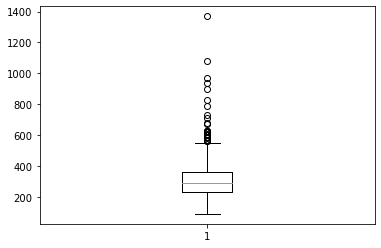

In [73]:
from random import randint
import time

#12
# Demonstration of distribution of coin-flip brackets

actual_winners = ( #Teams are given an index starting at the top left and ending at the bottom right
      [], #placeholder so each round can have the right index
      [0,3,5,6,9,10,12,14,16,18,20,22,24,26,28,31,32,35,36,38,41,42,44,46,48,51,53,54,57,58,61,62], #rd 1
      [0,6,10,14,18,22,26,31,32,36,41,46,48,54,57,61], #rd 2
      [6,14,18,31,36,46,48,61], #rd 3 (E8)
      [14,18,46,48], #rd 4 (F4)
      [18,48], #rd 5 (final)
      [48]) #rd 6 (winner)

# coin-flip bracket
def pick_round(teams):
    loser_list = []
    
    for i in range(0, len(teams) - 1, 2):
        loser_list.append(i + randint(0,1)) # get a list of random losers
        
    loser_list.reverse() #reverse the list so it's in reverse numerical order (so we can remove by index)
    for loser in loser_list:
        teams.pop(loser)
        
    return teams

def coin_flip(actual_winners):
    sim_tourney = list(range(0, 64))
    predicted_winners = [[]]
    score = 0
    
    for rd in range(1,7):
        sim_tourney = pick_round(sim_tourney)
        predicted_winners.append(sim_tourney[:])
    
    for rd in range(1,7):
        for game in range(0, len(predicted_winners[rd])):
            score = (score + 10 * (2 ** (rd - 1))) if predicted_winners[rd][game] == actual_winners[rd][game] else score
        
    return score

coin_flips = []

start_time = time.time()

# How many coin flip brackets would you like? Feel free to change it (it runs slowly [>10s] above 200,000)
num_coin_flips = 1000
for i in range(0, num_coin_flips):
    coin_flips.append(coin_flip(actual_winners))

print(f"Runtime: {time.time() - start_time:.3f} s\n")

print(f"Average of {num_coin_flips} coin flip brackets: {sum(coin_flips) / len(coin_flips)}")

from matplotlib import pyplot

pyplot.boxplot(coin_flips)

    

In [74]:
#13 
# Other Model's game-by-game prediction accuracies for comparison
start_time = time.time()
dt_preds = trainAndPredict(DecisionTreeClassifier(), tourney_2022_df, 101, 63)
print(f"Decision Tree Accuracy: {accuracy(dt_preds):.4f}")
print(f"Decision Tree Runtime: {time.time() - start_time:.3f} s\n")

start_time = time.time()
rf_preds = trainAndPredict(RandomForestClassifier(), tourney_2022_df, 101, 63)
print(f"Random Forest Accuracy: {accuracy(rf_preds):.4f}")
print(f"Random Forest Runtime: {time.time() - start_time:.3f} s\n")

start_time = time.time()
nn_preds = trainAndPredict(MLPClassifier(), tourney_2022_df, 101, 63)
print(f"Neural Networks Accuracy: {accuracy(nn_preds):.4f}")
print(f"Neural Networks Runtime: {time.time() - start_time:.3f} s\n")

start_time = time.time()
xgb_preds = trainAndPredict(xgb.XGBClassifier(eta=0.11), tourney_2022_df, 1, 63)
print(f"XGB Accuracy: {accuracy(xgb_preds):.4f}")
print(f"XGB Runtime: {time.time() - start_time:.3f} s\n")

# historical 2010-2019
start_time = time.time()
accuracies = predictHistorical(DecisionTreeClassifier())
print(f"Decision Tree Avg game-by-game accuracy across all games from 2010-2019: {sum(accuracies) / len(accuracies):.4f}")
print(f"Decision Tree Runtime: {time.time() - start_time:.2f} s\n")

start_time = time.time()
accuracies = predictHistorical(RandomForestClassifier())
print(f"Random Forest Avg game-by-game accuracy across all games from 2010-2019: {sum(accuracies) / len(accuracies):.4f}")
print(f"Random Forest Runtime: {time.time() - start_time:.2f} s\n")

start_time = time.time()
accuracies = predictHistorical(MLPClassifier())
print(f"Neural Networks Avg game-by-game accuracy across all games from 2010-2019: {sum(accuracies) / len(accuracies):.4f}")
print(f"Neural Networks Runtime: {time.time() - start_time:.2f} s\n")

start_time = time.time()
accuracies = predictHistorical(xgb.XGBClassifier(eta=0.11))
print(f"XGB Avg game-by-game accuracy across all games from 2010-2019: {sum(accuracies) / len(accuracies):.4f}")
print(f"XGB Runtime: {time.time() - start_time:.2f} s")

Decision Tree Accuracy: 0.6032
Decision Tree Runtime: 1.110 s

Random Forest Accuracy: 0.6667
Random Forest Runtime: 17.861 s

Neural Networks Accuracy: 0.5079
Neural Networks Runtime: 47.839 s

XGB Accuracy: 0.6190
XGB Runtime: 0.365 s

Decision Tree Avg game-by-game accuracy across all games from 2010-2019: 0.6317
Decision Tree Runtime: 0.14 s

Random Forest Avg game-by-game accuracy across all games from 2010-2019: 0.6905
Random Forest Runtime: 2.03 s

Neural Networks Avg game-by-game accuracy across all games from 2010-2019: 0.6937
Neural Networks Runtime: 6.59 s

XGB Avg game-by-game accuracy across all games from 2010-2019: 0.6921
XGB Runtime: 6.66 s


In [75]:
#14
# Other Model's tournament prediction scores for comparison
start_time = time.time()
bracket_score_2022 = tournament(DecisionTreeClassifier(), bracket_df, 1, 0)
print(f"Decision Tree Bracket Score (2022): {bracket_score_2022}")
print(f"Decision Tree Runtime: {time.time() - start_time:.2f} s\n")

start_time = time.time()
bracket_score_2022 = tournament(RandomForestClassifier(), bracket_df, 1, 0)
print(f"Random Forest Bracket Score (2022): {bracket_score_2022}")
print(f"Random Forest Runtime: {time.time() - start_time:.2f} s\n")

start_time = time.time()
bracket_score_2022 = tournament(MLPClassifier(), bracket_df, 1, 0)
print(f"Neural Networks Bracket Score (2022): {bracket_score_2022}")
print(f"Neural Networks Runtime: {time.time() - start_time:.2f} s\n")

start_time = time.time()
bracket_score_2022 = tournament(xgb.XGBClassifier(eta=0.11), bracket_df, 1, 0)
print(f"XGB Avg Bracket Bracket Score (2022): {bracket_score_2022}")
print(f"XGB Avg Bracket Runtime: {time.time() - start_time:.2f} s\n")

# historical tourney scores 2010-2019
start_time = time.time()
historical_scores = tourneyHistorical(DecisionTreeClassifier())
print(f"Decision Tree Avg Bracket Score 2010-2019: {sum(historical_scores) / len(historical_scores)}")
print(f"Decision Tree Runtime: {time.time() - start_time:.3f} s\n")

start_time = time.time()
historical_scores = tourneyHistorical(RandomForestClassifier())
print(f"Random Forest Avg Bracket Score 2010-2019: {sum(historical_scores) / len(historical_scores)}")
print(f"Random Forest Runtime: {time.time() - start_time:.3f} s\n")

start_time = time.time()
historical_scores = tourneyHistorical(MLPClassifier())
print(f"Neural Networks Avg Bracket Score 2010-2019: {sum(historical_scores) / len(historical_scores)}")
print(f"Neural Networks Runtime: {time.time() - start_time:.3f} s\n")

start_time = time.time()
historical_scores = tourneyHistorical(xgb.XGBClassifier(eta=0.11))
print(f"XGB Avg Bracket Score 2010-2019: {sum(historical_scores) / len(historical_scores)}")
print(f"XGB Runtime: {time.time() - start_time:.3f} s\n")

Decision Tree Bracket Score (2022): 380
Decision Tree Runtime: 0.19 s

Random Forest Bracket Score (2022): 580
Random Forest Runtime: 1.16 s

Neural Networks Bracket Score (2022): 290
Neural Networks Runtime: 3.14 s

XGB Avg Bracket Bracket Score (2022): 1090
XGB Avg Bracket Runtime: 2.63 s

Decision Tree Avg Bracket Score 2010-2019: 335.55555555555554
Decision Tree Runtime: 2.983 s

Random Forest Avg Bracket Score 2010-2019: 430.0
Random Forest Runtime: 13.979 s

Neural Networks Avg Bracket Score 2010-2019: 326.6666666666667
Neural Networks Runtime: 38.148 s

XGB Avg Bracket Score 2010-2019: 411.1111111111111
XGB Runtime: 24.521 s

